In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.__version__

'1.5.2'

In [12]:
df = pd.read_csv('../../data/final/final.csv')
neighbourhoods = df['Neighbourhood'].unique()

In [13]:
data = df.loc[df['Neighbourhood'] == neighbourhoods[1]]
data.index = pd.to_datetime(data['year'], format='%Y')

In [14]:
data.head()

,Neighbourhood,year,livability_score,green_score,Verhuizing,Verhuizing binnen gridcel,Vestiging,Vertrek,nuisance,1.1.1 Diefstal/inbraak woning,...,1.2.5 Diefstal af/uit/van ov. voertuigen,1.3.1 Ongevallen (weg),"1.4.2 Moord, doodslag",1.4.3 Openlijk geweld (persoon),1.4.4 Bedreiging,1.4.5 Mishandeling,1.4.6 Straatroof,1.4.7 Overval,2.2.1 Vernieling cq. zaakbeschadiging,2.4.2 Huisvredebreuk
year,,,,,,,,,,,,,,,,,,,,,
2014-01-01,Belcrum,2014,42.386274,20.300813,4.304348,2.0,5.454545,5.347826,4.750000,13.0,...,5.0,21.0,2.0,2.0,8.0,18.0,2.0,0.0,22.0,0.0
2015-01-01,Belcrum,2015,40.808704,20.139881,4.391304,1.0,5.333333,5.454545,8.000000,10.0,...,3.0,24.0,0.0,0.0,16.0,21.0,0.0,0.0,25.0,1.0
2016-01-01,Belcrum,2016,39.194789,22.051724,3.625000,0.0,8.137931,4.230769,8.833333,15.0,...,3.0,21.0,0.0,3.0,15.0,25.0,1.0,0.0,31.0,1.0
2017-01-01,Belcrum,2017,43.575087,23.031008,4.826087,0.0,5.733333,5.481481,11.250000,9.0,...,7.0,17.0,0.0,0.0,21.0,20.0,0.0,0.0,27.0,0.0
2018-01-01,Belcrum,2018,40.836322,19.787879,4.733333,1.5,5.793103,5.250000,10.166667,11.0,...,9.0,39.0,1.0,2.0,22.0,16.0,0.0,0.0,25.0,3.0


<AxesSubplot: xlabel='year'>

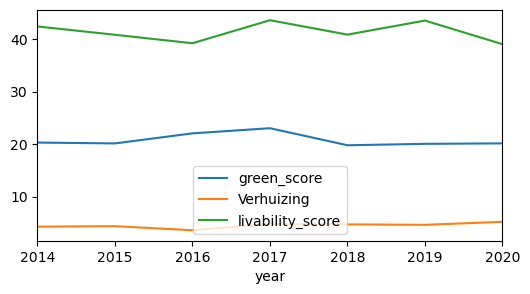

In [16]:
data = data[['green_score', 'Verhuizing', 'livability_score']]
data.plot(figsize=(6, 3))

In [17]:
data

,green_score,Verhuizing,livability_score
year,,,
2014-01-01,20.300813,4.304348,42.386274
2015-01-01,20.139881,4.391304,40.808704
2016-01-01,22.051724,3.625000,39.194789
2017-01-01,23.031008,4.826087,43.575087
2018-01-01,19.787879,4.733333,40.836322
2019-01-01,20.056664,4.653846,43.509325
2020-01-01,20.147086,5.219458,39.016633


In [18]:
l_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

In [19]:
x, x1, y, = np.array(list(zip(*data.to_numpy())))
x, x1, y = x.reshape(-1, 1), x1.reshape(-1, 1), y.reshape(-1, 1)
final_x = np.concatenate((x, x1), axis=1)
final_x

array([[20.30081301,  4.30434783],
       [20.13988095,  4.39130435],
       [22.05172414,  3.625     ],
       [23.03100775,  4.82608696],
       [19.78787879,  4.73333333],
       [20.05666395,  4.65384615],
       [20.14708572,  5.21945786]])

In [20]:
train_size = 4

X_train, y_train, X_test, y_test = final_x[:train_size], y[:train_size], final_x[train_size:], y[train_size:]

In [21]:
l_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

C:\Users\bobka\AppData\Local\Temp\ipykernel_13220\2767949042.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor(max_features=3, random_state=1)

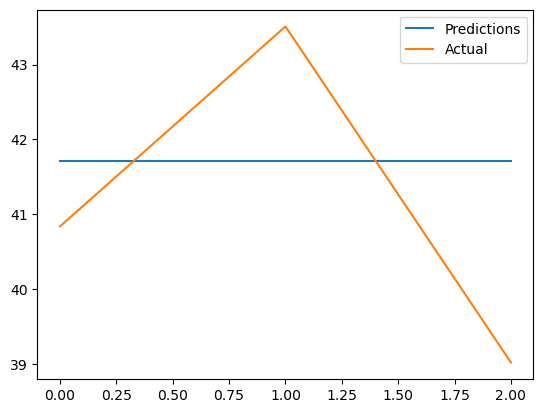

In [22]:
predicted = rf_model.predict((X_test))

plt.plot(predicted, label='Predictions')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [23]:
mean_squared_error(predicted, y_test)

3.7491360481817395

In [24]:
y_train

array([[42.38627375],
       [40.80870385],
       [39.19478875],
       [43.57508722]])